In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-fares/Data_Train.xlsx
/kaggle/input/flight-fares/Sample_submission.xlsx
/kaggle/input/flight-fares/Test_set.xlsx


In [232]:
# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
import math

In [3]:
df = pd.read_excel('../input/flight-fares/Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
# making a copy for visualization and feature engineering

In [7]:
df_copy = df.copy()

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
len(df_copy)

10683

In [10]:
df_copy['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [233]:
# converting string format to datetime format

In [11]:
df_copy['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [12]:
df_copy['Date_of_Journey'] = pd.to_datetime(df_copy['Date_of_Journey'], format='%d/%m/%Y')


In [13]:
df_copy['Date_of_Journey'].value_counts()

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    199
2019-03-15    162
2019-03-18    156
2019-03-12    142
2019-04-09    125
2019-04-03    110
2019-06-21    109
2019-06-18    105
2019-04-06    100
2019-04-27     94
2019-04-24     92
2019-05-03     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-04-12     63
Name: Date_of_Journey, dtype: int64

In [14]:
df_date = df_copy['Date_of_Journey']

In [15]:
# converting to only month format

In [16]:
months = df_copy.Date_of_Journey.dt.month

In [17]:
type(months)

pandas.core.series.Series

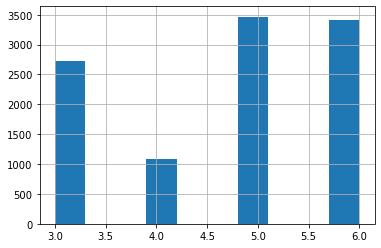

In [18]:
months.hist()

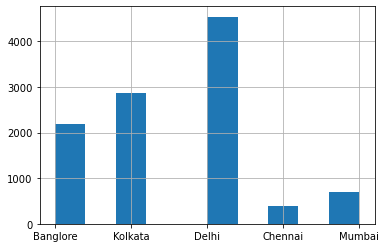

In [19]:

df_copy['Source'].hist()

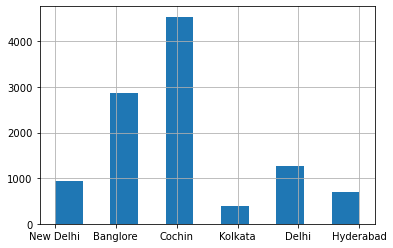

In [20]:
#plt.figure(figsize=(10,10))

df_copy['Destination'].hist(bins = 11)

In [21]:
len(df_copy['Route'].value_counts())

128

In [22]:
df_copy['Route'].isnull().sum()

1

In [23]:
len(df_copy['Dep_Time'].value_counts())

222

In [24]:
df_copy['Dep_Time'].isnull().sum()

0

In [25]:
df_copy['Dep_Time'].iloc[0]

'22:20'

In [26]:
df_dep_time = pd.to_datetime(df_copy['Dep_Time'], format='%H:%M')


In [27]:
df_dep_hrs = df_dep_time.dt.hour

In [28]:
df_dep_hrs

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_Time, Length: 10683, dtype: int64

In [29]:
df_dep_mins = df_dep_time.dt.minute

In [30]:
df_dep_mins

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_Time, Length: 10683, dtype: int64

In [31]:
# preferred departure hour

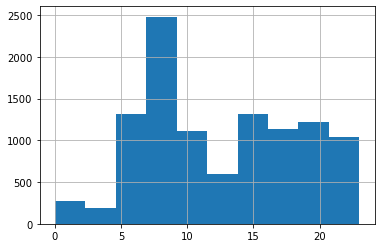

In [32]:
df_dep_hrs.hist()

In [33]:
df_copy['dep_hour'] = df_dep_hrs

In [34]:
df_copy['dep_minutes'] = df_dep_mins

In [35]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50


In [36]:
df_copy.drop(inplace = True, columns = ['Dep_Time'],axis = 1)

In [37]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50


In [38]:
df_copy['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [39]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
# miles between source and destination needs to be added

In [41]:
# arrival time mismatch needs to be sorted

In [42]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [43]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50


In [44]:
df_copy['Date_of_Journey'].dt.day.value_counts()

9     1406
6     1288
27    1130
21    1111
1     1075
24    1052
15     984
12     957
3      848
18     832
Name: Date_of_Journey, dtype: int64

In [45]:
df['Arrival_Time'].head()

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
Name: Arrival_Time, dtype: object

In [46]:
# date of journey  ------> day , month

In [47]:
df_month_of_journey = df_copy['Date_of_Journey'].dt.month

In [48]:
df_day_of_journey = df_copy['Date_of_Journey'].dt.day

In [49]:
df_copy['dep_day'] = df_day_of_journey

In [50]:
df_copy['dep_month'] = df_month_of_journey

In [51]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3


In [52]:
df_copy.drop(columns = ['Date_of_Journey'],axis = 1, inplace = True)

In [53]:
df_copy.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3


In [54]:
df_arrival_time = pd.to_datetime(df_copy['Arrival_Time'])

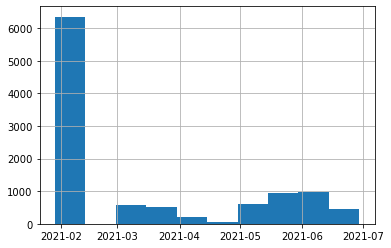

In [55]:
df_arrival_time.hist()

In [56]:
# arrival time calculation

In [57]:
arrival_hr = df_arrival_time.dt.hour

In [58]:
arrival_min = df_arrival_time.dt.minute

In [59]:
df_copy['arrival_hr'] = arrival_hr
df_copy['arrival_min'] = arrival_min

In [60]:
df_copy.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,21,35


In [61]:
df_arrival_time[df_arrival_time.dt.date != datetime.now().date()].index

Int64Index([    0,     2,     6,     7,     8,    13,    15,    17,    18,
               19,
            ...
            10653, 10657, 10660, 10662, 10663, 10666, 10667, 10672, 10673,
            10674],
           dtype='int64', length=4335)

In [62]:
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [63]:
df_date_of_journey = pd.to_datetime(df['Date_of_Journey'],format = '%d/%M/%Y')

In [64]:
df_date_of_journey

0       2019-01-24 00:03:00
1       2019-01-01 00:05:00
2       2019-01-09 00:06:00
3       2019-01-12 00:05:00
4       2019-01-01 00:03:00
                ...        
10678   2019-01-09 00:04:00
10679   2019-01-27 00:04:00
10680   2019-01-27 00:04:00
10681   2019-01-01 00:03:00
10682   2019-01-09 00:05:00
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [65]:
def arrival_date_calculator(df_arrival_time,df_departure_time):
    
    arrival_date = []
    
    for x in df_arrival_time.iteritems():
        if x[1].date() != datetime.now().date():
            arrival_date.append(x[1].date())
        else:
            print(df_departure_time.iloc[x[0]])
            arrival_date.append(df_departure_time.iloc[x[0]].date())
            
    return np.array(arrival_date)

In [66]:
arrival_date = arrival_date_calculator(df_arrival_time,df_date_of_journey)

2019-01-01 00:05:00
2019-01-12 00:05:00
2019-01-01 00:03:00
2019-01-24 00:06:00
2019-01-27 00:05:00
2019-01-01 00:06:00
2019-01-18 00:04:00
2019-01-24 00:06:00
2019-01-24 00:04:00
2019-01-15 00:04:00
2019-01-06 00:03:00
2019-01-03 00:04:00
2019-01-01 00:05:00
2019-01-15 00:05:00
2019-01-18 00:06:00
2019-01-15 00:06:00
2019-01-18 00:06:00
2019-01-01 00:05:00
2019-01-06 00:04:00
2019-01-18 00:05:00
2019-01-27 00:06:00
2019-01-21 00:05:00
2019-01-18 00:05:00
2019-01-06 00:03:00
2019-01-03 00:06:00
2019-01-21 00:05:00
2019-01-15 00:03:00
2019-01-06 00:05:00
2019-01-21 00:03:00
2019-01-24 00:03:00
2019-01-27 00:05:00
2019-01-03 00:05:00
2019-01-09 00:03:00
2019-01-01 00:03:00
2019-01-06 00:03:00
2019-01-06 00:06:00
2019-01-03 00:06:00
2019-01-24 00:05:00
2019-01-24 00:06:00
2019-01-24 00:04:00
2019-01-06 00:05:00
2019-01-21 00:05:00
2019-01-12 00:03:00
2019-01-01 00:06:00
2019-01-24 00:06:00
2019-01-21 00:03:00
2019-01-09 00:03:00
2019-01-03 00:04:00
2019-01-03 00:04:00
2019-01-21 00:03:00


2019-01-09 00:03:00
2019-01-24 00:04:00
2019-01-01 00:04:00
2019-01-18 00:05:00
2019-01-27 00:05:00
2019-01-21 00:03:00
2019-01-09 00:06:00
2019-01-03 00:06:00
2019-01-24 00:03:00
2019-01-18 00:03:00
2019-01-18 00:05:00
2019-01-18 00:06:00
2019-01-21 00:04:00
2019-01-24 00:05:00
2019-01-09 00:05:00
2019-01-01 00:05:00
2019-01-21 00:06:00
2019-01-03 00:03:00
2019-01-21 00:05:00
2019-01-21 00:05:00
2019-01-12 00:06:00
2019-01-03 00:03:00
2019-01-01 00:04:00
2019-01-01 00:04:00
2019-01-06 00:06:00
2019-01-06 00:03:00
2019-01-21 00:03:00
2019-01-12 00:04:00
2019-01-27 00:03:00
2019-01-27 00:05:00
2019-01-27 00:03:00
2019-01-27 00:03:00
2019-01-18 00:05:00
2019-01-24 00:06:00
2019-01-21 00:05:00
2019-01-06 00:05:00
2019-01-21 00:04:00
2019-01-09 00:06:00
2019-01-15 00:06:00
2019-01-06 00:06:00
2019-01-09 00:04:00
2019-01-03 00:03:00
2019-01-12 00:05:00
2019-01-03 00:05:00
2019-01-03 00:04:00
2019-01-18 00:04:00
2019-01-09 00:05:00
2019-01-15 00:06:00
2019-01-27 00:03:00
2019-01-06 00:04:00


2019-01-15 00:06:00
2019-01-21 00:03:00
2019-01-12 00:06:00
2019-01-15 00:04:00
2019-01-03 00:06:00
2019-01-12 00:04:00
2019-01-06 00:05:00
2019-01-03 00:06:00
2019-01-18 00:04:00
2019-01-15 00:05:00
2019-01-27 00:03:00
2019-01-09 00:03:00
2019-01-12 00:06:00
2019-01-24 00:06:00
2019-01-12 00:05:00
2019-01-03 00:05:00
2019-01-12 00:06:00
2019-01-09 00:05:00
2019-01-03 00:06:00
2019-01-12 00:05:00
2019-01-15 00:05:00
2019-01-18 00:04:00
2019-01-21 00:06:00
2019-01-21 00:03:00
2019-01-27 00:05:00
2019-01-21 00:05:00
2019-01-15 00:06:00
2019-01-24 00:05:00
2019-01-12 00:05:00
2019-01-09 00:06:00
2019-01-18 00:05:00
2019-01-01 00:06:00
2019-01-27 00:03:00
2019-01-24 00:05:00
2019-01-15 00:03:00
2019-01-09 00:05:00
2019-01-24 00:06:00
2019-01-18 00:05:00
2019-01-21 00:06:00
2019-01-15 00:06:00
2019-01-27 00:03:00
2019-01-15 00:06:00
2019-01-18 00:03:00
2019-01-06 00:06:00
2019-01-27 00:05:00
2019-01-09 00:05:00
2019-01-21 00:03:00
2019-01-27 00:04:00
2019-01-03 00:05:00
2019-01-21 00:05:00


2019-01-18 00:05:00
2019-01-15 00:05:00
2019-01-27 00:05:00
2019-01-27 00:04:00
2019-01-12 00:05:00
2019-01-18 00:05:00
2019-01-03 00:05:00
2019-01-27 00:06:00
2019-01-09 00:06:00
2019-01-03 00:06:00
2019-01-27 00:06:00
2019-01-06 00:04:00
2019-01-21 00:03:00
2019-01-21 00:05:00
2019-01-09 00:05:00
2019-01-15 00:06:00
2019-01-09 00:05:00
2019-01-06 00:03:00
2019-01-03 00:06:00
2019-01-24 00:03:00
2019-01-01 00:04:00
2019-01-24 00:04:00
2019-01-01 00:03:00
2019-01-15 00:06:00
2019-01-24 00:06:00
2019-01-27 00:04:00
2019-01-03 00:06:00
2019-01-27 00:05:00
2019-01-09 00:03:00
2019-01-06 00:04:00
2019-01-18 00:06:00
2019-01-27 00:05:00
2019-01-21 00:05:00
2019-01-01 00:04:00
2019-01-18 00:06:00
2019-01-06 00:06:00
2019-01-15 00:03:00
2019-01-15 00:03:00
2019-01-12 00:06:00
2019-01-27 00:06:00
2019-01-09 00:03:00
2019-01-18 00:04:00
2019-01-06 00:05:00
2019-01-21 00:03:00
2019-01-24 00:06:00
2019-01-24 00:06:00
2019-01-27 00:06:00
2019-01-09 00:06:00
2019-01-06 00:06:00
2019-01-12 00:05:00


2019-01-03 00:06:00
2019-01-09 00:05:00
2019-01-18 00:05:00
2019-01-01 00:05:00
2019-01-12 00:06:00
2019-01-15 00:03:00
2019-01-09 00:03:00
2019-01-27 00:05:00
2019-01-03 00:04:00
2019-01-06 00:06:00
2019-01-06 00:06:00
2019-01-06 00:05:00
2019-01-09 00:06:00
2019-01-18 00:04:00
2019-01-03 00:04:00
2019-01-18 00:05:00
2019-01-03 00:06:00
2019-01-01 00:04:00
2019-01-06 00:06:00
2019-01-09 00:06:00
2019-01-12 00:06:00
2019-01-21 00:04:00
2019-01-12 00:06:00
2019-01-21 00:03:00
2019-01-24 00:03:00
2019-01-12 00:05:00
2019-01-06 00:05:00
2019-01-01 00:04:00
2019-01-09 00:05:00
2019-01-06 00:06:00
2019-01-06 00:06:00
2019-01-27 00:03:00
2019-01-09 00:05:00
2019-01-24 00:05:00
2019-01-27 00:03:00
2019-01-03 00:03:00
2019-01-03 00:04:00
2019-01-03 00:05:00
2019-01-24 00:06:00
2019-01-03 00:04:00
2019-01-21 00:06:00
2019-01-18 00:05:00
2019-01-09 00:03:00
2019-01-24 00:05:00
2019-01-01 00:05:00
2019-01-09 00:05:00
2019-01-03 00:03:00
2019-01-12 00:06:00
2019-01-01 00:05:00
2019-01-09 00:04:00


2019-01-03 00:06:00
2019-01-27 00:03:00
2019-01-21 00:03:00
2019-01-06 00:05:00
2019-01-15 00:06:00
2019-01-15 00:06:00
2019-01-21 00:03:00
2019-01-27 00:05:00
2019-01-15 00:05:00
2019-01-03 00:03:00
2019-01-12 00:06:00
2019-01-09 00:06:00
2019-01-27 00:04:00
2019-01-15 00:03:00
2019-01-12 00:05:00
2019-01-09 00:05:00
2019-01-27 00:05:00
2019-01-03 00:03:00
2019-01-06 00:03:00
2019-01-06 00:06:00
2019-01-03 00:06:00
2019-01-21 00:03:00
2019-01-27 00:06:00
2019-01-24 00:04:00
2019-01-27 00:06:00
2019-01-01 00:03:00
2019-01-12 00:03:00
2019-01-18 00:05:00
2019-01-09 00:06:00
2019-01-18 00:04:00
2019-01-24 00:06:00
2019-01-21 00:05:00
2019-01-01 00:05:00
2019-01-27 00:06:00
2019-01-12 00:04:00
2019-01-24 00:06:00
2019-01-03 00:04:00
2019-01-21 00:05:00
2019-01-03 00:03:00
2019-01-12 00:05:00
2019-01-21 00:03:00
2019-01-15 00:03:00
2019-01-09 00:06:00
2019-01-15 00:05:00
2019-01-06 00:04:00
2019-01-09 00:06:00
2019-01-06 00:04:00
2019-01-15 00:04:00
2019-01-12 00:06:00
2019-01-09 00:05:00


2019-01-18 00:05:00
2019-01-09 00:05:00
2019-01-27 00:03:00
2019-01-06 00:06:00
2019-01-21 00:03:00
2019-01-18 00:03:00
2019-01-24 00:06:00
2019-01-24 00:06:00
2019-01-03 00:06:00
2019-01-03 00:03:00
2019-01-24 00:05:00
2019-01-18 00:05:00
2019-01-09 00:04:00
2019-01-21 00:05:00
2019-01-18 00:05:00
2019-01-01 00:06:00
2019-01-24 00:06:00
2019-01-15 00:03:00
2019-01-09 00:06:00
2019-01-09 00:05:00
2019-01-01 00:06:00
2019-01-21 00:05:00
2019-01-12 00:06:00
2019-01-27 00:03:00
2019-01-09 00:06:00
2019-01-06 00:06:00
2019-01-12 00:06:00
2019-01-18 00:05:00
2019-01-12 00:05:00
2019-01-12 00:06:00
2019-01-15 00:06:00
2019-01-01 00:06:00
2019-01-01 00:03:00
2019-01-06 00:06:00
2019-01-15 00:05:00
2019-01-21 00:05:00
2019-01-27 00:03:00
2019-01-24 00:06:00
2019-01-18 00:03:00
2019-01-03 00:06:00
2019-01-18 00:05:00
2019-01-21 00:03:00
2019-01-27 00:04:00
2019-01-09 00:03:00
2019-01-12 00:04:00
2019-01-12 00:06:00
2019-01-24 00:05:00
2019-01-24 00:06:00
2019-01-12 00:03:00
2019-01-21 00:05:00


2019-01-03 00:05:00
2019-01-21 00:04:00
2019-01-24 00:04:00
2019-01-09 00:05:00
2019-01-09 00:03:00
2019-01-09 00:05:00
2019-01-03 00:04:00
2019-01-12 00:03:00
2019-01-03 00:04:00
2019-01-27 00:06:00
2019-01-09 00:06:00
2019-01-24 00:04:00
2019-01-27 00:05:00
2019-01-18 00:05:00
2019-01-01 00:03:00
2019-01-03 00:05:00
2019-01-27 00:04:00
2019-01-01 00:03:00
2019-01-15 00:06:00
2019-01-18 00:06:00
2019-01-18 00:06:00
2019-01-15 00:05:00
2019-01-21 00:05:00
2019-01-18 00:03:00
2019-01-12 00:06:00
2019-01-21 00:03:00
2019-01-03 00:05:00
2019-01-15 00:04:00
2019-01-06 00:04:00
2019-01-09 00:06:00
2019-01-27 00:05:00
2019-01-15 00:04:00
2019-01-27 00:05:00
2019-01-27 00:06:00
2019-01-03 00:06:00
2019-01-27 00:06:00
2019-01-06 00:06:00
2019-01-15 00:05:00
2019-01-27 00:06:00
2019-01-27 00:04:00
2019-01-09 00:05:00
2019-01-06 00:03:00
2019-01-09 00:05:00
2019-01-09 00:06:00
2019-01-27 00:03:00
2019-01-15 00:03:00
2019-01-12 00:05:00
2019-01-15 00:05:00
2019-01-21 00:06:00
2019-01-09 00:03:00


2019-01-12 00:06:00
2019-01-21 00:05:00
2019-01-12 00:05:00
2019-01-09 00:06:00
2019-01-15 00:06:00
2019-01-21 00:05:00
2019-01-21 00:06:00
2019-01-09 00:05:00
2019-01-03 00:03:00
2019-01-06 00:05:00
2019-01-15 00:06:00
2019-01-15 00:05:00
2019-01-12 00:05:00
2019-01-27 00:03:00
2019-01-27 00:05:00
2019-01-12 00:06:00
2019-01-21 00:04:00
2019-01-03 00:06:00
2019-01-06 00:03:00
2019-01-09 00:06:00
2019-01-12 00:05:00
2019-01-21 00:03:00
2019-01-01 00:05:00
2019-01-12 00:05:00
2019-01-21 00:05:00
2019-01-18 00:05:00
2019-01-09 00:03:00
2019-01-03 00:06:00
2019-01-01 00:04:00
2019-01-27 00:05:00
2019-01-12 00:04:00
2019-01-06 00:04:00
2019-01-09 00:05:00
2019-01-24 00:03:00
2019-01-09 00:05:00
2019-01-03 00:03:00
2019-01-15 00:05:00
2019-01-15 00:05:00
2019-01-24 00:04:00
2019-01-06 00:03:00
2019-01-06 00:06:00
2019-01-03 00:03:00
2019-01-06 00:06:00
2019-01-18 00:06:00
2019-01-15 00:05:00
2019-01-27 00:06:00
2019-01-12 00:06:00
2019-01-03 00:05:00
2019-01-06 00:04:00
2019-01-18 00:06:00


In [67]:
arrival_date[:5]

array([datetime.date(2021, 3, 22), datetime.date(2019, 1, 1),
       datetime.date(2021, 6, 10), datetime.date(2019, 1, 12),
       datetime.date(2019, 1, 1)], dtype=object)

In [68]:
df_copy['arrival_date'] = pd.DataFrame(arrival_date)

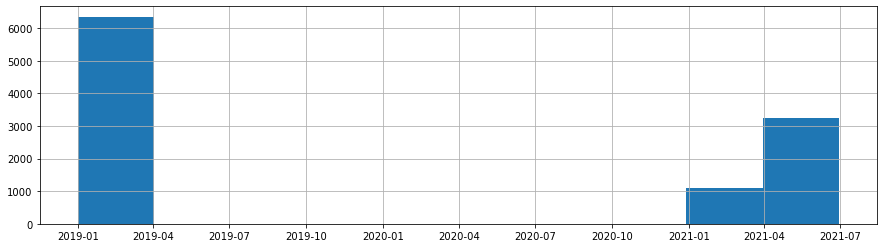

In [69]:
plt.figure(figsize=(15,4))
df_copy['arrival_date'].hist()

In [70]:
def extract_day_month(dataframe):
    arrival_day = []
    arrival_month = []
    for x in dataframe.iteritems():
        arrival_day.append(x[1].day)
        arrival_month.append(x[1].month)
    
    return np.array(arrival_day),np.array(arrival_month)

In [71]:
arrival_day,arrival_month = extract_day_month(df_copy['arrival_date'])

In [72]:
arrival_day

array([22,  1, 10, ..., 27,  1,  9])

In [73]:
arrival_month

array([3, 1, 6, ..., 1, 1, 1])

In [74]:
df_copy['arrival_day'] = pd.DataFrame(arrival_day)
df_copy['arrival_month'] = pd.DataFrame(arrival_month)

In [75]:
df_copy.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_date,arrival_day,arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20,24,3,1,10,2021-03-22,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,50,1,5,13,15,2019-01-01,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25,9,6,4,25,2021-06-10,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,5,12,5,23,30,2019-01-12,12,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50,1,3,21,35,2019-01-01,1,1


In [76]:
df_copy.drop(columns = ['arrival_date','Arrival_Time'],inplace = True, axis = 1)

In [77]:
df_copy.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,24,3,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,1,5,13,15,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,9,6,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,12,5,23,30,12,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,1,3,21,35,1,1


In [78]:
# duration

In [79]:
df_copy['Duration'].isnull().sum()

0

In [80]:
def duration_conversion(dataframe):
    
    total_minutes = []
    for x in dataframe.iterrows():
        time = x[1][4].split(' ')
        if len(time) == 2:
            total_minutes.append(float(''.join(list(time[0])[:-1]))*60 + float(''.join(list(time[1])[:-1])))
            pass
        else:
            pattern_hrs = r'\d+h'
            pattern_mins = r'\d+m'
            
            if re.search(pattern_hrs,time[0]):
                total_minutes.append(float(''.join(list(time[0])[:-1]))*60)
                
            elif re.search(pattern_mins,time[0]):
                total_minutes.append(float(''.join(list(time[0])[:-1])))
            
            else:
                print(float(''.join(list(time[0])[:-1])))
                print(x[0])
                
    return np.array(total_minutes)

In [81]:
df_copy.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,24,3,1,10,22,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,1,5,13,15,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,9,6,4,25,10,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,12,5,23,30,12,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,1,3,21,35,1,1


In [82]:
total_mins = duration_conversion(df_copy)

In [83]:
total_mins.shape

(10683,)

In [84]:
df_copy['total_mins'] = pd.DataFrame(total_mins)

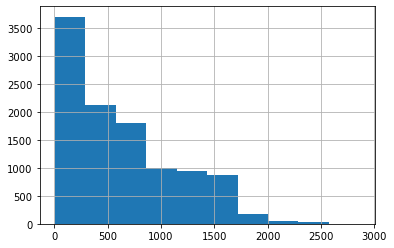

In [85]:
df_copy['total_mins'].hist()

In [86]:
df_copy['total_mins'].iloc[21]

920.0

In [87]:
# data error

In [88]:
df_copy.iloc[6474]

Airline                        Air India
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              17327
dep_hour                              16
dep_minutes                           50
dep_day                                6
dep_month                              3
arrival_hr                            16
arrival_min                           55
arrival_day                            6
arrival_month                          1
total_mins                             5
Name: 6474, dtype: object

In [89]:
df_copy.drop(columns = ['Duration'],inplace = True, axis = 1)

In [90]:
df_copy.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,24,3,1,10,22,3,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,1,5,13,15,1,1,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,9,6,4,25,10,6,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,12,5,23,30,12,1,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,1,3,21,35,1,1,285.0


In [91]:
# total stops

In [92]:
df_copy[df_copy['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,9,45,6,5,9,25,7,5,1420.0


In [93]:
df_copy.drop(index = [9039],inplace = True)

In [94]:
df_copy[df_copy['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins


In [95]:
df_copy['Total_Stops'].isnull().sum()

0

In [96]:
df_copy['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
onehotencoder = OneHotEncoder()

In [99]:
total_stops_1hot_encoded = onehotencoder.fit_transform(df_copy['Total_Stops'].values.reshape(-1,1))

In [100]:
total_stops_1hot_encoded.shape

(10682, 5)

In [101]:
onehotencoder.categories_

[array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
       dtype=object)]

In [102]:
type(total_stops_1hot_encoded)

scipy.sparse.csr.csr_matrix

In [103]:
df_copy['1stop'] = pd.DataFrame(total_stops_1hot_encoded[:,0].A)
df_copy['2stop'] = pd.DataFrame(total_stops_1hot_encoded[:,1].A)
df_copy['3stop'] = pd.DataFrame(total_stops_1hot_encoded[:,2].A)
df_copy['4stop'] = pd.DataFrame(total_stops_1hot_encoded[:,3].A)
df_copy['nostop'] = pd.DataFrame(total_stops_1hot_encoded[:,4].A)

In [104]:
df_copy['nostop'].value_counts()

0.0    7190
1.0    3491
Name: nostop, dtype: int64

In [105]:
df_copy.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dep_hour,dep_minutes,dep_day,...,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins,1stop,2stop,3stop,4stop,nostop
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,24,...,1,10,22,3,170.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,50,1,...,13,15,1,1,445.0,0.0,1.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,25,9,...,4,25,10,6,1140.0,0.0,1.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,5,12,...,23,30,12,1,325.0,1.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,1,...,21,35,1,1,285.0,1.0,0.0,0.0,0.0,0.0


In [106]:
df_copy.drop(columns = ['Total_Stops'],inplace = True, axis = 1)

In [107]:
df_copy.head()

,Airline,Source,Destination,Route,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins,1stop,2stop,3stop,4stop,nostop
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,22,20,24,3,1,10,22,3,170.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,5,50,1,5,13,15,1,1,445.0,0.0,1.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,25,9,6,4,25,10,6,1140.0,0.0,1.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,18,5,12,5,23,30,12,1,325.0,1.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,16,50,1,3,21,35,1,1,285.0,1.0,0.0,0.0,0.0,0.0


In [108]:
df_copy['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [109]:
additional_info_1hot_encoded = onehotencoder.fit_transform(df_copy['Additional_Info'].values.reshape(-1,1))

In [110]:
additional_info_1hot_encoded.shape

(10682, 10)

In [111]:
onehotencoder.categories_

[array(['1 Long layover', '1 Short layover', '2 Long layover',
        'Business class', 'Change airports', 'In-flight meal not included',
        'No Info', 'No check-in baggage included', 'No info',
        'Red-eye flight'], dtype=object)]

In [112]:
df_copy['one_long_layover'] = pd.DataFrame(additional_info_1hot_encoded[:,0].A)
df_copy['one_short_layover'] = pd.DataFrame(additional_info_1hot_encoded[:,1].A)
df_copy['two_long_layover'] = pd.DataFrame(additional_info_1hot_encoded[:,2].A)
df_copy['business_class'] = pd.DataFrame(additional_info_1hot_encoded[:,3].A)
df_copy['change_airports'] = pd.DataFrame(additional_info_1hot_encoded[:,4].A)
df_copy['in_flight_meal_not'] = pd.DataFrame(additional_info_1hot_encoded[:,5].A)
df_copy['no_check_in_bag'] = pd.DataFrame(additional_info_1hot_encoded[:,7].A)
df_copy['red_eye_flight'] = pd.DataFrame(additional_info_1hot_encoded[:,9].A)

In [113]:
additional_info_1hot_encoded[:,0].shape

(10682, 1)

In [114]:
df_copy.head()

,Airline,Source,Destination,Route,Additional_Info,Price,dep_hour,dep_minutes,dep_day,dep_month,...,4stop,nostop,one_long_layover,one_short_layover,two_long_layover,business_class,change_airports,in_flight_meal_not,no_check_in_bag,red_eye_flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,22,20,24,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,5,50,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,25,9,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,18,5,12,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,16,50,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df_copy.drop(columns = ['Additional_Info'],inplace = True, axis = 1)

In [116]:
df_copy.head()

,Airline,Source,Destination,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,...,4stop,nostop,one_long_layover,one_short_layover,two_long_layover,business_class,change_airports,in_flight_meal_not,no_check_in_bag,red_eye_flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,22,20,24,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,25,9,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,18,5,12,5,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,16,50,1,3,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
airline_1hot = onehotencoder.fit_transform(df_copy['Airline'].values.reshape(-1,1))

In [118]:
airline_1hot.shape

(10682, 12)

In [119]:
onehotencoder.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object)]

In [120]:
airline_1hot.shape

(10682, 12)

In [121]:
airline_1hot[:,0].shape

(10682, 1)

In [122]:
df_copy['air_asia'] = pd.DataFrame(airline_1hot[:,0].A)
df_copy['air_india'] = pd.DataFrame(airline_1hot[:,1].A)
df_copy['go_air'] = pd.DataFrame(airline_1hot[:,2].A)
df_copy['indigo'] = pd.DataFrame(airline_1hot[:,3].A)
df_copy['jet_airways'] = pd.DataFrame(airline_1hot[:,4].A)
df_copy['jet_airways_business'] = pd.DataFrame(airline_1hot[:,5].A)
df_copy['multiple_carriers'] = pd.DataFrame(airline_1hot[:,6].A)
df_copy['multiple_carriers_premuim_economy'] = pd.DataFrame(airline_1hot[:,7].A)
df_copy['SpiceJet'] = pd.DataFrame(airline_1hot[:,8].A)
df_copy['Trujet'] = pd.DataFrame(airline_1hot[:,9].A)
df_copy['Vistara'] = pd.DataFrame(airline_1hot[:,10].A)
df_copy['Vistara_premuim_economy'] = pd.DataFrame(airline_1hot[:,11].A)

In [123]:
df_copy.head()

,Airline,Source,Destination,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,...,go_air,indigo,jet_airways,jet_airways_business,multiple_carriers,multiple_carriers_premuim_economy,SpiceJet,Trujet,Vistara,Vistara_premuim_economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,3897,22,20,24,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,25,9,6,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,18,5,12,5,23,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,13302,16,50,1,3,21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df_copy.drop(columns = ['Airline'],inplace = True, axis = 1)

In [125]:
df_copy.head()

,Source,Destination,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,...,go_air,indigo,jet_airways,jet_airways_business,multiple_carriers,multiple_carriers_premuim_economy,SpiceJet,Trujet,Vistara,Vistara_premuim_economy
0,Banglore,New Delhi,BLR → DEL,3897,22,20,24,3,1,10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,25,9,6,4,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kolkata,Banglore,CCU → NAG → BLR,6218,18,5,12,5,23,30,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Banglore,New Delhi,BLR → NAG → DEL,13302,16,50,1,3,21,35,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
source_1hot = onehotencoder.fit_transform(df_copy['Source'].values.reshape(-1,1))

In [127]:
source_1hot.shape

(10682, 5)

In [128]:
onehotencoder.categories_

[array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)]

In [129]:
df_copy['source_Banglore'] = pd.DataFrame(source_1hot[:,0].A)
df_copy['source_Chennai'] = pd.DataFrame(source_1hot[:,1].A)
df_copy['source_Delhi'] = pd.DataFrame(source_1hot[:,2].A)
df_copy['source_Kolkata'] = pd.DataFrame(source_1hot[:,3].A)
df_copy['source_Mumbai'] = pd.DataFrame(source_1hot[:,4].A)

In [130]:
df_copy.head()

,Source,Destination,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,...,multiple_carriers_premuim_economy,SpiceJet,Trujet,Vistara,Vistara_premuim_economy,source_Banglore,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai
0,Banglore,New Delhi,BLR → DEL,3897,22,20,24,3,1,10,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Delhi,Cochin,DEL → LKO → BOM → COK,13882,9,25,9,6,4,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Kolkata,Banglore,CCU → NAG → BLR,6218,18,5,12,5,23,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Banglore,New Delhi,BLR → NAG → DEL,13302,16,50,1,3,21,35,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [131]:
df_copy.drop(columns = ['Source'], inplace = True, axis = 1)

In [132]:
destination_1hot = onehotencoder.fit_transform(df_copy['Destination'].values.reshape(-1,1))

In [133]:
destination_1hot.shape

(10682, 6)

In [134]:
onehotencoder.categories_

[array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
       dtype=object)]

In [135]:
df_copy['destination_Banglore'] = pd.DataFrame(destination_1hot[:,0].A)
df_copy['destination_Cochin'] = pd.DataFrame(destination_1hot[:,1].A)
df_copy['destination_Delhi'] = pd.DataFrame(destination_1hot[:,2].A)
df_copy['destination_Hydrebad'] = pd.DataFrame(destination_1hot[:,3].A)
df_copy['destination_Kolkata'] = pd.DataFrame(destination_1hot[:,4].A)
df_copy['destination_new_delhi'] = pd.DataFrame(destination_1hot[:,5].A)

In [136]:
df_copy.head()

,Destination,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hydrebad,destination_Kolkata,destination_new_delhi
0,New Delhi,BLR → DEL,3897,22,20,24,3,1,10,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Banglore,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,15,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Cochin,DEL → LKO → BOM → COK,13882,9,25,9,6,4,25,10,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Banglore,CCU → NAG → BLR,6218,18,5,12,5,23,30,12,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,New Delhi,BLR → NAG → DEL,13302,16,50,1,3,21,35,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
df_copy.drop(columns = ['Destination'], inplace = True, axis = 1)

In [138]:
df_copy.head()

,Route,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hydrebad,destination_Kolkata,destination_new_delhi
0,BLR → DEL,3897,22,20,24,3,1,10,22,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CCU → IXR → BBI → BLR,7662,5,50,1,5,13,15,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,DEL → LKO → BOM → COK,13882,9,25,9,6,4,25,10,6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CCU → NAG → BLR,6218,18,5,12,5,23,30,12,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,BLR → NAG → DEL,13302,16,50,1,3,21,35,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [139]:
route_1hot = onehotencoder.fit_transform(df_copy['Route'].values.reshape(-1,1))

In [140]:
route_1hot.shape

(10682, 128)

In [141]:
np.sum(df_copy['Route'].value_counts() == 1)

23

In [142]:
route_cat = onehotencoder.categories_[0][::]

In [143]:
for index in range(len(route_cat)):
    df_copy[route_cat[index]] = pd.DataFrame(route_1hot[:,index].A)

In [144]:
df_copy.drop(columns = ['Route'], axis = 1 ,inplace = True)

In [145]:
print(df_copy.columns)

Index(['Price', 'dep_hour', 'dep_minutes', 'dep_day', 'dep_month',
       'arrival_hr', 'arrival_min', 'arrival_day', 'arrival_month',
       'total_mins',
       ...
       'DEL → LKO → BOM → COK', 'DEL → LKO → COK', 'DEL → MAA → BOM → COK',
       'DEL → MAA → COK', 'DEL → NAG → BOM → COK', 'DEL → PNQ → COK',
       'DEL → RPR → NAG → BOM → COK', 'DEL → TRV → COK',
       'DEL → UDR → BOM → COK', 'MAA → CCU'],
      dtype='object', length=174)


In [146]:
len(df_copy)

10682

In [147]:
def validate_arrival_date(journey_date,arrival_date):
    
    for x in range(10682):
        print(journey_date.dt.date.iloc[x])
        print(arrival_date.dt.date.iloc[x])

In [148]:
df_date_of_journey.iloc[0]

Timestamp('2019-01-24 00:03:00')

In [149]:
df_arrival_time.dt.date.iloc[0]

datetime.date(2021, 3, 22)

In [150]:
df_temp = df_copy[df_copy['dep_day'] <= df_copy['arrival_day']]

In [151]:
df.iloc[21]

Airline                  Air India
Date_of_Journey         21/03/2019
Source                    Banglore
Destination              New Delhi
Route              BLR → COK → DEL
Dep_Time                     22:00
Arrival_Time          13:20 19 Mar
Duration                   15h 20m
Total_Stops                 1 stop
Additional_Info            No info
Price                         6955
Name: 21, dtype: object

In [152]:
df_temp.head()

,Price,dep_hour,dep_minutes,dep_day,dep_month,arrival_hr,arrival_min,arrival_day,arrival_month,total_mins,...,DEL → LKO → BOM → COK,DEL → LKO → COK,DEL → MAA → BOM → COK,DEL → MAA → COK,DEL → NAG → BOM → COK,DEL → PNQ → COK,DEL → RPR → NAG → BOM → COK,DEL → TRV → COK,DEL → UDR → BOM → COK,MAA → CCU
1,7662,5,50,1,5,13,15,1,1,445.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13882,9,25,9,6,4,25,10,6,1140.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6218,18,5,12,5,23,30,12,1,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13302,16,50,1,3,21,35,1,1,285.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3873,9,0,24,6,11,25,24,1,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
corr_matrix = df_temp.corr()

In [154]:
corr_matrix['arrival_day'].sort_values(ascending=False)

arrival_day              1.000000
dep_day                  0.997836
source_Delhi             0.101632
destination_Cochin       0.101632
DEL → AMD → BOM → COK    0.067540
                           ...   
destination_Banglore    -0.052013
source_Banglore         -0.054578
BLR → BOM → DEL         -0.067262
destination_new_delhi   -0.074583
Price                   -0.136433
Name: arrival_day, Length: 174, dtype: float64

In [155]:
corr_matrix['arrival_month'].sort_values(ascending=False)

arrival_month      1.000000
total_mins         0.612566
dep_hour           0.444267
Price              0.290330
2stop              0.284844
                     ...   
indigo            -0.168680
BLR → DEL         -0.190140
source_Banglore   -0.203316
nostop            -0.325132
arrival_hr        -0.489241
Name: arrival_month, Length: 174, dtype: float64

In [156]:
df_copy.drop(columns = ['arrival_day','arrival_month','arrival_hr','arrival_min'], inplace = True, axis = 1)

In [157]:
df_copy.head()

,Price,dep_hour,dep_minutes,dep_day,dep_month,total_mins,1stop,2stop,3stop,4stop,...,DEL → LKO → BOM → COK,DEL → LKO → COK,DEL → MAA → BOM → COK,DEL → MAA → COK,DEL → NAG → BOM → COK,DEL → PNQ → COK,DEL → RPR → NAG → BOM → COK,DEL → TRV → COK,DEL → UDR → BOM → COK,MAA → CCU
0,3897,22,20,24,3,170.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7662,5,50,1,5,445.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13882,9,25,9,6,1140.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6218,18,5,12,5,325.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13302,16,50,1,3,285.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
attributes = list(df_copy.columns[:6])

In [159]:
type(attributes)

list

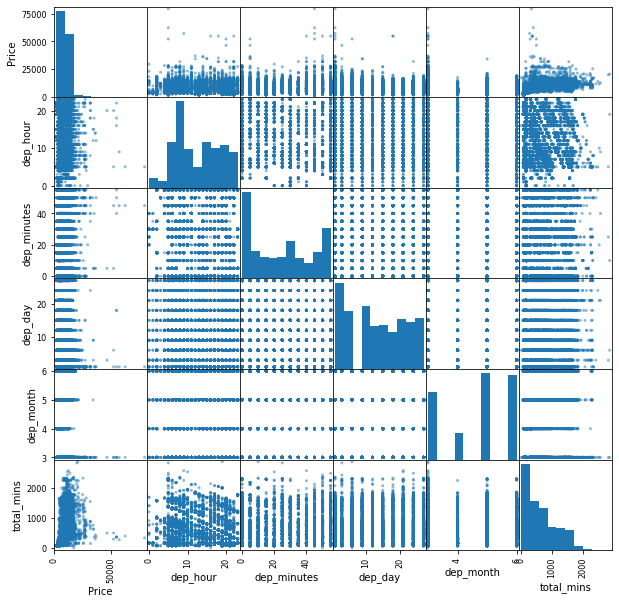

In [160]:
pd.plotting.scatter_matrix(df_copy[attributes],figsize=(10,10))
plt.show()

In [161]:
# since no positive correlation exists hence we would move forwad with these attributes

In [162]:
data = df_copy.drop(columns = ['Price'],axis = 1).values

In [163]:
data.shape

(10682, 169)

In [164]:
target = df_copy['Price'].values

In [165]:
for x in list(df_copy.columns):
    print(x)

Price
dep_hour
dep_minutes
dep_day
dep_month
total_mins
1stop
2stop
3stop
4stop
nostop
one_long_layover
one_short_layover
two_long_layover
business_class
change_airports
in_flight_meal_not
no_check_in_bag
red_eye_flight
air_asia
air_india
go_air
indigo
jet_airways
jet_airways_business
multiple_carriers
multiple_carriers_premuim_economy
SpiceJet
Trujet
Vistara
Vistara_premuim_economy
source_Banglore
source_Chennai
source_Delhi
source_Kolkata
source_Mumbai
destination_Banglore
destination_Cochin
destination_Delhi
destination_Hydrebad
destination_Kolkata
destination_new_delhi
BLR → AMD → DEL
BLR → BBI → DEL
BLR → BDQ → DEL
BLR → BOM → AMD → DEL
BLR → BOM → BHO → DEL
BLR → BOM → DEL
BLR → BOM → IDR → DEL
BLR → BOM → IDR → GWL → DEL
BLR → BOM → IXC → DEL
BLR → BOM → JDH → DEL
BLR → BOM → NAG → DEL
BLR → BOM → UDR → DEL
BLR → CCU → BBI → DEL
BLR → CCU → BBI → HYD → DEL
BLR → CCU → BBI → HYD → VGA → DEL
BLR → CCU → DEL
BLR → CCU → GAU → DEL
BLR → COK → DEL
BLR → DEL
BLR → GAU → DEL
BLR → GOI 

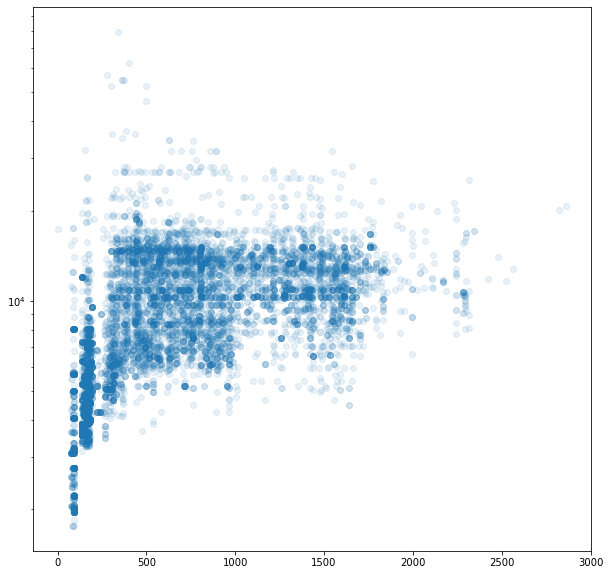

In [166]:
#df_copy.plot(kind = 'scatter', x = 'total_mins', y = 'Price', alpha = 0.1)
plt.figure(figsize = (10,10))
plt.yscale('log')
plt.scatter(x = df_copy['total_mins'] , y = df_copy['Price'], alpha = 0.1)

In [167]:
corr_matrix = df_copy.corr()

In [168]:
corr_matrix["Price"].sort_values(ascending=False)

Price                1.000000
total_mins           0.506480
jet_airways          0.362757
1stop                0.298579
2stop                0.266657
                       ...   
SpiceJet            -0.260683
destination_Delhi   -0.264454
BLR → DEL           -0.267098
indigo              -0.311540
nostop              -0.523938
Name: Price, Length: 170, dtype: float64

In [169]:
df_copy.drop(columns = ['dep_hour','dep_minutes','dep_day','dep_month'], axis = 1, inplace = True)

In [170]:
df_copy.head()

,Price,total_mins,1stop,2stop,3stop,4stop,nostop,one_long_layover,one_short_layover,two_long_layover,...,DEL → LKO → BOM → COK,DEL → LKO → COK,DEL → MAA → BOM → COK,DEL → MAA → COK,DEL → NAG → BOM → COK,DEL → PNQ → COK,DEL → RPR → NAG → BOM → COK,DEL → TRV → COK,DEL → UDR → BOM → COK,MAA → CCU
0,3897,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7662,445.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13882,1140.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6218,325.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13302,285.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
std_scalar = StandardScaler()

In [173]:
df_copy['total_mins'] = std_scalar.fit_transform(df_copy['total_mins'].values.reshape(-1,1))

In [174]:
df_copy.head()

,Price,total_mins,1stop,2stop,3stop,4stop,nostop,one_long_layover,one_short_layover,two_long_layover,...,DEL → LKO → BOM → COK,DEL → LKO → COK,DEL → MAA → BOM → COK,DEL → MAA → COK,DEL → NAG → BOM → COK,DEL → PNQ → COK,DEL → RPR → NAG → BOM → COK,DEL → TRV → COK,DEL → UDR → BOM → COK,MAA → CCU
0,3897,-0.931498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7662,-0.389953,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13882,0.978679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6218,-0.626263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13302,-0.705034,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
count = 0
for x in df_copy.columns:
    print(count,x)
    count+=1

0 Price
1 total_mins
2 1stop
3 2stop
4 3stop
5 4stop
6 nostop
7 one_long_layover
8 one_short_layover
9 two_long_layover
10 business_class
11 change_airports
12 in_flight_meal_not
13 no_check_in_bag
14 red_eye_flight
15 air_asia
16 air_india
17 go_air
18 indigo
19 jet_airways
20 jet_airways_business
21 multiple_carriers
22 multiple_carriers_premuim_economy
23 SpiceJet
24 Trujet
25 Vistara
26 Vistara_premuim_economy
27 source_Banglore
28 source_Chennai
29 source_Delhi
30 source_Kolkata
31 source_Mumbai
32 destination_Banglore
33 destination_Cochin
34 destination_Delhi
35 destination_Hydrebad
36 destination_Kolkata
37 destination_new_delhi
38 BLR → AMD → DEL
39 BLR → BBI → DEL
40 BLR → BDQ → DEL
41 BLR → BOM → AMD → DEL
42 BLR → BOM → BHO → DEL
43 BLR → BOM → DEL
44 BLR → BOM → IDR → DEL
45 BLR → BOM → IDR → GWL → DEL
46 BLR → BOM → IXC → DEL
47 BLR → BOM → JDH → DEL
48 BLR → BOM → NAG → DEL
49 BLR → BOM → UDR → DEL
50 BLR → CCU → BBI → DEL
51 BLR → CCU → BBI → HYD → DEL
52 BLR → CCU → BB

In [176]:
df_final_copy = df_copy.iloc[:,:38]

In [177]:
df_final_copy.head()

,Price,total_mins,1stop,2stop,3stop,4stop,nostop,one_long_layover,one_short_layover,two_long_layover,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hydrebad,destination_Kolkata,destination_new_delhi
0,3897,-0.931498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662,-0.389953,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13882,0.978679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6218,-0.626263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13302,-0.705034,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [178]:
df_final_copy['1stop'].isnull().sum()

1

In [179]:
df_final_copy.drop(df_final_copy.index[10681], inplace = True)

In [180]:
len(df_final_copy)

10681

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
df_final_copy = df_final_copy.sample(frac = 1)

In [183]:
X = df_final_copy.iloc[:,1:].values

In [184]:
y = df_final_copy.iloc[:,0].values.reshape(-1,1)

In [185]:
y[:10]

array([[ 4804],
       [16757],
       [ 5380],
       [ 4050],
       [12411],
       [ 3100],
       [14067],
       [ 8266],
       [10262],
       [ 4049]])

(array([6.028e+03, 4.389e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

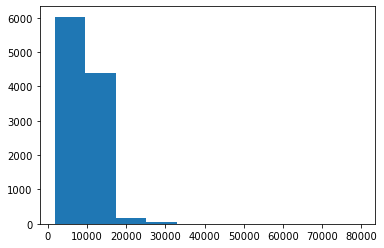

In [186]:
plt.hist(y)

In [187]:
X[0]

array([-0.9610366,  0.       ,  0.       ,  0.       ,  0.       ,
        1.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  1.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  1.       ,
        0.       ,  1.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ])

In [188]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

In [189]:
X_train.shape

(8544, 37)

In [190]:
y_train.shape

(8544, 1)

In [191]:
# applying linear regression

In [192]:
from sklearn.model_selection import cross_val_score

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
lin_model = LinearRegression()

In [195]:
lin_scores = cross_val_score(lin_model,X,y,cv = 10,scoring='neg_mean_squared_error')

In [196]:
lin_scores = np.sqrt(-lin_scores)

In [197]:
np.mean(lin_scores)

34942678457031.48

In [198]:
# applying Decision Tree

In [199]:
from sklearn.tree import DecisionTreeRegressor

In [200]:
dec_tree = DecisionTreeRegressor()

In [201]:
dec_score = cross_val_score(dec_tree,X,y,cv = 10,scoring = 'neg_mean_squared_error')
dec_score = np.mean(np.sqrt(-dec_score))

In [202]:
dec_score

3156.633814393093

In [203]:
# applying Random Forests

In [204]:
from sklearn.ensemble import RandomForestRegressor

In [205]:
forest_reg = RandomForestRegressor()

In [206]:
forest_scores = cross_val_score(forest_reg, X, y.ravel(),
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(np.mean(forest_rmse_scores))

2879.8397551490793


In [207]:
# trying SGD

In [208]:
from sklearn.linear_model import SGDRegressor

In [209]:
sgd_linear = SGDRegressor(penalty='l1', eta0= 0.001,early_stopping=True)

In [210]:
sgd_scores = cross_val_score(sgd_linear, X, y.ravel(), scoring = "neg_mean_squared_error", cv=10)
np.mean(np.sqrt(-sgd_scores))

3359.4341882415138

In [211]:
# trying Neural Networks

In [212]:
import tensorflow as tf
from tensorflow import keras

In [213]:
X_train.shape

(8544, 37)

In [234]:
model = keras.models.Sequential(
[
    keras.layers.Dense(100,activation = 'relu',input_shape = X_train.shape[1:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

In [235]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [236]:
history = model.fit(X_train,y_train,epochs = 30, validation_data=(X_test,y_test))

Epoch 1/30
267/267 [==============================] - 1s 4ms/step - loss: 51190388.0000 - mse: 51190388.0000 - mae: 5360.5854 - val_loss: 13599674.0000 - val_mse: 13599674.0000 - val_mae: 2499.4983
Epoch 2/30
267/267 [==============================] - 1s 3ms/step - loss: 12600298.0000 - mse: 12600298.0000 - mae: 2382.8076 - val_loss: 11646850.0000 - val_mse: 11646850.0000 - val_mae: 2271.4534
Epoch 3/30
267/267 [==============================] - 1s 3ms/step - loss: 11537374.0000 - mse: 11537374.0000 - mae: 2232.1870 - val_loss: 11068463.0000 - val_mse: 11068463.0000 - val_mae: 2199.7622
Epoch 4/30
267/267 [==============================] - 1s 3ms/step - loss: 11205621.0000 - mse: 11205621.0000 - mae: 2184.2585 - val_loss: 10834795.0000 - val_mse: 10834795.0000 - val_mae: 2138.8174
Epoch 5/30
267/267 [==============================] - 1s 3ms/step - loss: 11095028.0000 - mse: 11095028.0000 - mae: 2168.0137 - val_loss: 10812512.0000 - val_mse: 10812512.0000 - val_mae: 2113.8782
Epoch 6/30

In [238]:
math.sqrt(9041839)

3006.965081273808

In [218]:
# selecting random forests from all the models

In [219]:
forest_reg = RandomForestRegressor(bootstrap = True, max_depth = 70, n_estimators = 400, max_features = 'auto', min_samples_split = 10, min_samples_leaf = 4)

In [220]:
forest_scores = cross_val_score(forest_reg, X, y.ravel(),
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(np.mean(forest_rmse_scores))

2814.362870041035


In [239]:
# applying gridsearch to identify best hyperparameters

In [255]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 30, 40, 60], 'max_features': [2, 4, 8, 10, 20]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 40], 'max_features': [2, 3, 4, 5]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

In [256]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train,y_train.ravel())

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [242]:
grid_search.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=60, random_state=42)

In [243]:
from sklearn.metrics import mean_squared_error

In [249]:
forest_reg = RandomForestRegressor(max_features=20, n_estimators=60, random_state=42)

In [250]:
forest_reg.fit(X_train,y_train.ravel())

RandomForestRegressor(max_features=20, n_estimators=60, random_state=42)

In [251]:
# the final rmse error 

In [252]:
np.sqrt(mean_squared_error(y_test,forest_reg.predict(X_test)))

2704.6061518432716

In [248]:
df_final_copy['Price'].describe()

count    10681.000000
mean      9086.964985
std       4611.692553
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64